<a href="https://colab.research.google.com/github/Raziel-JKM/Practice/blob/main/ai/EX-1/rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [90]:
#이미지의 크기가 28x28  변경
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/Data/train/scissor"
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/Data/train/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/Data/train/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


In [91]:
#가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
import numpy as np

def load_data(img_path, number_of_data=1600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [92]:

image_dir_path = "/content/drive/MyDrive/Data/train/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1600, 28, 28, 3)
y_train shape: (1600,)


라벨:  0


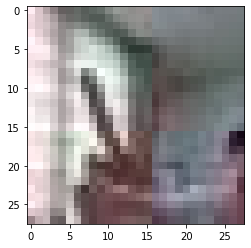

In [93]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [94]:
print(x_train.shape)

(1600, 28, 28, 3)


In [95]:
from sklearn.model_selection import train_test_split
#train 데이터를 훈련셋 검증셋 80%, 20%로 랜덤하게 변경
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, random_state=12)
#x_split_train, x_split_val, y_split_train, y_split_val = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, random_state=12)
# train, validation data의 사이즈 확인
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(1280, 28, 28, 3) (320, 28, 28, 3) (1280,) (320,)


#네트워크 설계

In [96]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [97]:
# 모델 훈련
result = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 2s 28ms/step - loss: 1.0170 - accuracy: 0.5688 - val_loss: 0.8179 - val_accuracy: 0.4844
Epoch 2/20
40/40 [==============================] - 1s 24ms/step - loss: 0.6282 - accuracy: 0.7547 - val_loss: 0.4633 - val_accuracy: 0.8438
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.3980 - accuracy: 0.8594 - val_loss: 0.3059 - val_accuracy: 0.8875
Epoch 4/20
40/40 [==============================] - 1s 25ms/step - loss: 0.2696 - accuracy: 0.9000 - val_loss: 0.2123 - val_accuracy: 0.9156
Epoch 5/20
40/40 [==============================] - 1s 25ms/step - loss: 0.1924 - accuracy: 0.9391 - val_loss: 0.1642 - val_accuracy: 0.9531
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1587 - accuracy: 0.9422 - val_loss: 0.1240 - val_accuracy: 0.9594
Epoch 7/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1230 - accuracy: 0.9680 - val_loss: 0.1108 - val_accuracy: 0.9625
Epoch 8/20
40

In [98]:

# #모델 잘만들었는지 평가해보기
# test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [103]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28 , 28),
                                                  batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [100]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=x_train,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(28, 28), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=x_train,
        x_col='Filepath',
        y_col='Label',
        target_size=(28, 28),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=x_train,
        x_col='Filepath',
        y_col='Label',
        target_size=(28, 28),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [101]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

In [102]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
30/30 [==============================] - 41s 90ms/step - loss: 1.0491 - accuracy: 0.4896 - val_loss: 0.8879 - val_accuracy: 0.9250
Epoch 2/10
30/30 [==============================] - 3s 91ms/step - loss: 0.7502 - accuracy: 0.7385 - val_loss: 0.4336 - val_accuracy: 0.8667
Epoch 3/10
30/30 [==============================] - 3s 87ms/step - loss: 0.4746 - accuracy: 0.8302 - val_loss: 0.2966 - val_accuracy: 0.9250
Epoch 4/10
30/30 [==============================] - 3s 90ms/step - loss: 0.2933 - accuracy: 0.8917 - val_loss: 0.1367 - val_accuracy: 0.9708
Epoch 5/10
30/30 [==============================] - 3s 86ms/step - loss: 0.2095 - accuracy: 0.9323 - val_loss: 0.0885 - val_accuracy: 0.9875
Epoch 6/10
30/30 [==============================] - 3s 84ms/step - loss: 0.1636 - accuracy: 0.9448 - val_loss: 0.0723 - val_accuracy: 0.9792
Epoch 7/10
30/30 [==============================] - 3s 86ms/step - loss: 0.1152 - accuracy: 0.9604 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 8/10
3